In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
import math


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)



 Plot of the first 50 samples in the MNIST training set


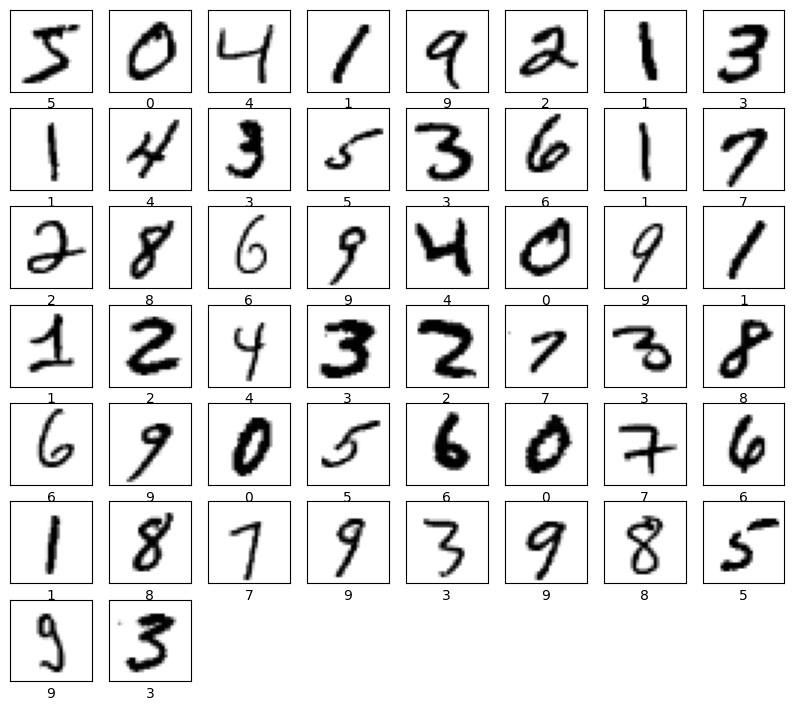

In [2]:
# Plotting data samples
numbers_to_display = 50
print('\n Plot of the first', numbers_to_display ,'samples in the MNIST training set')

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


 Plot of the first 50 samples in the MNIST training set


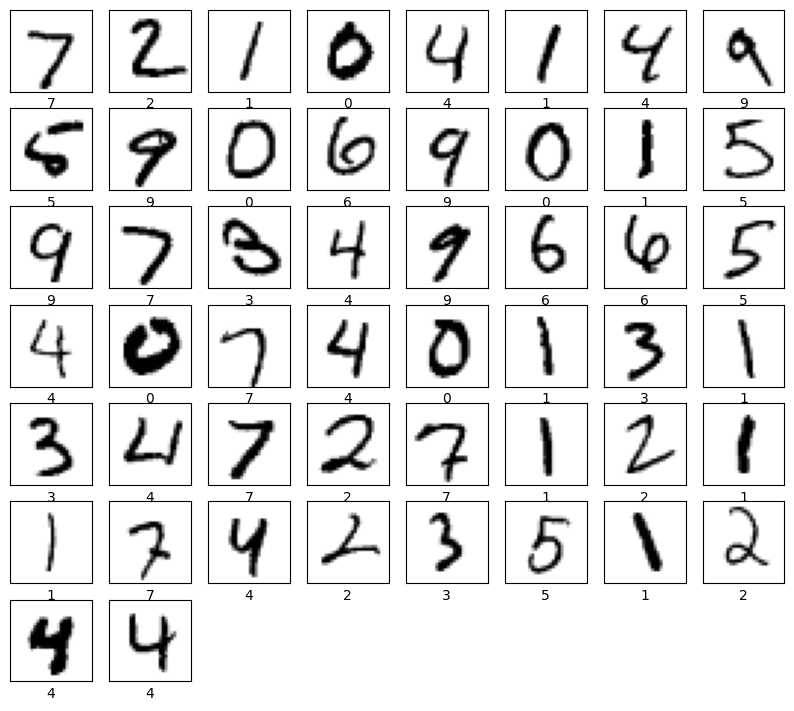

In [3]:
# Plotting data samples
numbers_to_display = 50
print('\n Plot of the first', numbers_to_display ,'samples in the MNIST training set')

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

In [4]:
# Save not normalize dataset
x_trainNN = x_train
x_testNN = x_test

# Reshape the dataset to have a single color channel
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))


# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    ])


# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )

# Train the model
model.fit(x_train, 
          y_train,
          epochs=1,
          batch_size=8,
          validation_data=(x_test, y_test)
         )






7500/7500 [==============================] - 43s 6ms/step - loss: 0.1200 - accuracy: 0.9635 - val_loss: 0.0684 - val_accuracy: 0.9769


In [5]:
# after the training finishes, we will also save Marvin in Keras style (HDF5), so we do not have to 
# configurations of Marvin. The name has to be a string, like this: 'name.h5'
model_name = 'Marvin'
model.save(model_name, save_format='h5')

# It is best practice to indicate what configuration changes you did within the name, so you know
# which model you need to load already from its name
# Let's say instead of a learning rate of 0.001 you used 0.1, your naming could then look like:
# 'marvin_lr01.h5'

print('Success! You saved Model as: ', model_name)


Success! You saved Model as:  Marvin


C:\Users\sd021\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
import pandas as pd

# load a saved model configuration you want to evaluate
model_name = 'Marvin'
model_reloaded = tf.keras.models.load_model(model_name)

# Let Model predict on the test set, so we have some data to evaluate his performance.
predictions = model_reloaded.predict([x_test])

# make predictions
predictions = np.argmax(predictions, axis=1)
#pd.DataFrame(predictions)

313/313 [==============================] - 1s 2ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

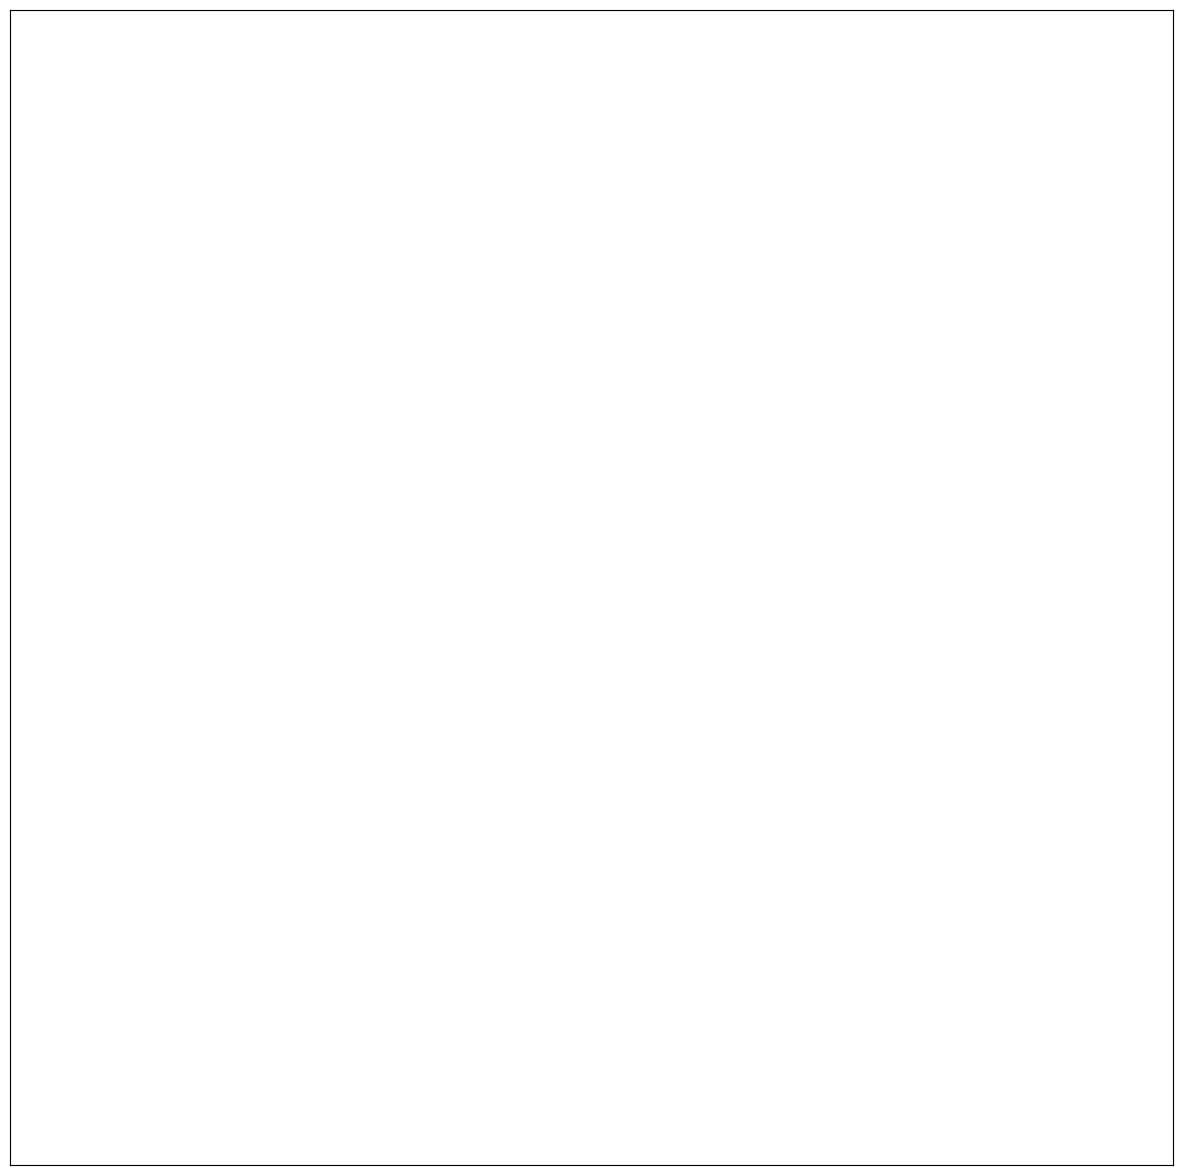

In [12]:
# Plot for the intuitive approach
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label != y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [19]:
# Find the worst predicated Images
for i in range(10):
    indices = np.where(np.argmax(y_test, axis=1) == i)[0]
    print(indices.shape)

AxisError: axis 1 is out of bounds for array of dimension 1

In [9]:
# Create a new dataset with the worst images
best_images = {}
for i in range(10):
    indices = np.where(np.argmax(y_test, axis=1) == i)[1]
    top_indices = indices[np.argsort(model.predict(x_test[indices]))[:2]]
    worst_images[i] = x_test[top_indices]
                        
    num_cells = math.ceil(math.sqrt(numbers_to_display))
    plt.figure(figsize=(10,10))
    for i in range(numbers_to_display):
        plt.subplot(num_cells, num_cells, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(y_train[i])
plt.show()

IndexError: tuple index out of range

In [11]:
# Save the worst images to a file
for i in range(10):
    np.save(f'worst_images_of_{i}.npy', worst_images[i])

# Load the worst images from the file
for i in range(10):
    images = np.load(f'worst_images_of_{i}.npy', allow_pickle=True)
    
    # Display the images and print the labels
    for j, image in enumerate(images):
        plt.figure(figsize=(10, 10))
        plt.imshow(image)#.astype('uint8'))
        plt.title(f'Image {j + 1}')
        
        # Create arrays for x and y coordinates of the points
        x = []
        y = []
        
        # Add the label and probability to the arrays
        for i, (label, probability) in enumerate(zip(image[0], image[1])):
            x.append(label)
            y.append(probability)
        
        # Plot the points with labels
        plt.scatter(x, y, color='red')
        
        # Show the plot
        plt.show()

NameError: name 'worst_images' is not defined